In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_autocorrelation(X,
                        nlags=10000,
                        ):

    a = X-np.mean(X)
    C = np.zeros(nlags)
    for i in range(1,nlags):
        C[i] = np.sum( a[:-i] * a[i:])/len(X)
    C[0] = np.mean(a**2 )

    lags=np.arange(0,nlags)

    return lags,C/C[0]


## What happens if we try to make the OU process scale with $dt$?

- For the theoretical issues take a look at the section in the notes: Why did we choose $dW_i = r_i \sqrt{dt}$?

- For a numerical example, think about solving $$ x_n = x_{n-1} \exp\left(\frac{-dt}{\tau}\right) +  \gamma dt\,r_n $$
  
- This would be the same as if we had: $$ x_n = x_{n-1} \exp\left(\frac{-dt}{\tau}\right) +  \gamma' \sqrt{dt}\,r_n $$ with $\gamma'=\gamma \sqrt{dt}$

- This process would then have variance $\frac{1}{2} \gamma^2 dt \tau$, so if the resolution of the simulation changes the variance will change as well 

- In general this is why I try to avoid AR1 processes like $$ x_n = \rho x_{n-1} + \sigma r_n $$ its very unclear how the scaling changes in time. 
  - For example, imagine if we have 1000 samples that are dt=0.01 apart from each. Now imagine that we have 1000 samples that are dt=0.1 apart from each other. If the samples came from the same statistical process, then the variance and autocorrelation scale should be the same, but if we just naively apply that equation then they won't be. 
-  We can however figure this out by comparing it to the discretized OU process and setting a new time step dt', e.g.  $$ x_n = x_{n-1} \exp\left(\frac{-dt'}{\tau}\right) +  \gamma \sqrt{dt'}\,r_n $$ is the same thing as $$ x_n = \exp\left(\frac{-dt}{\tau'}\right)+  \gamma' \sqrt{dt}\,r_n $$ where $$\gamma'=\gamma\sqrt{\frac{dt'}{dt}}$$ $$\tau'=\tau\frac{dt}{dt'}$$

- So if we changed the time step in an AR1 process, we would have new coefficients given by $$ x_n = \rho' x_{n-1} + \sigma' r_n $$ where $$\rho' = \rho \exp\left(-\frac{dt'}{dt}\right)$$ and $$\sigma' = \sigma \sqrt{\frac{dt'}{dt}}$$



## Effective Autocorrelation time scales

Similar to a weighted mean, we can define an average or effective autocorrelation scale:

$$\overline{\tau} = \left(\int^{\infty}_{\infty} C(\tau) \tau d\tau \right)\left(\int^{\infty}_{\infty} C(\tau) d\tau\right)^{-1}$$ 


## Degrees of freedom for the significance estimate

- The textbook actually makes 2 different kinds of significance estimates in their figures and doesn't really explain
- The first is the kind that I did in the notes, which assumes that the number of degrees of freedom is the same as the number that you used to calculate things
- However this produces very small error estimates, and the reason is that the samples are (typically) autocorrelated 
- To fix this, you can change the degrees of freedom to be $$n'=n\frac{dt}{\overline{\tau}}$$ which accounts for the autocorrelation.


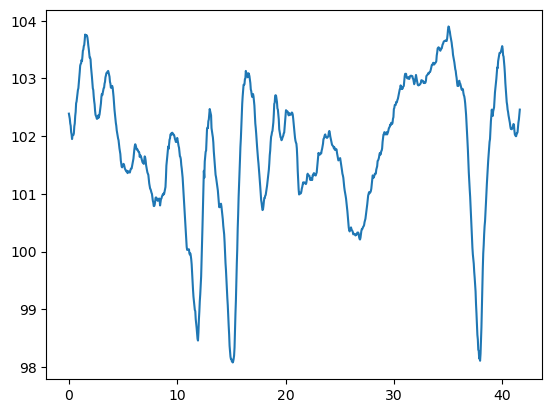

In [47]:
df=pd.read_csv('../data/weatherstats_montreal_hourly.csv')
p=df.pressure_sea.values
t=np.arange(0,1000/24,1/24)
plt.plot(t,p)

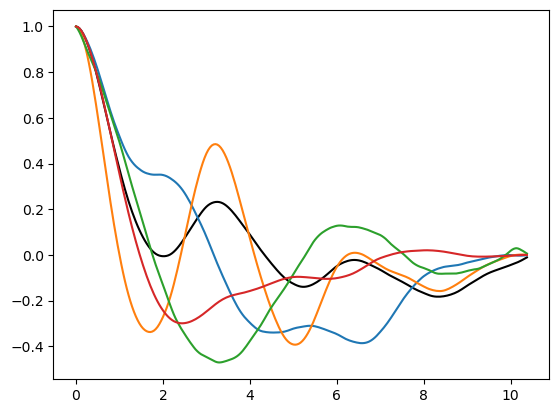

In [48]:

n=250
m=1000//n

lags_0,acf_0=get_autocorrelation(p,n)

plt.plot(lags_0/24,acf_0,'k')
for i in range(0,m):
    lags,acf=get_autocorrelation(p[i*n:i*n+n],n)
    plt.plot(lags/24,acf)
